In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 15)

# load dataset
df = pd.read_csv("datasets/student_prediction.csv")
# print number of missing values
print(df.isna().mean().sum())
df

0.0


,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [4]:
# number of unique values per feature, i.e., the state space
df.nunique()

STUDENTID      145
AGE              3
GENDER           2
HS_TYPE          3
SCHOLARSHIP      5
              ... 
CLASSROOM        3
CUML_GPA         5
EXP_GPA          4
COURSE ID        9
GRADE            8
Length: 33, dtype: int64

In [46]:
# Preprocessing to combine/aggregate some features
# Replace GRADE by only 2 values, pass (2) or fail (1) 
df['GRADE'] = np.where(df['GRADE'] > 1, 2, 1)
# Combine the parent's education into single feature COMB_EDU by taking the maximum education
df['COMB_EDU'] = np.amax(np.array([df['MOTHER_EDU'], df['FATHER_EDU']]).T, axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
140    2
141    2
142    1
143    2
144    2
Name: GRADE, Length: 145, dtype: int32

In [59]:
# np.array([df['MOTHER_EDU'], df['FATHER_EDU']]).T


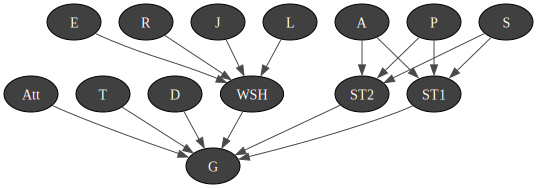

In [61]:
import pyAgrum as gum
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pyAgrum.lib.notebook as gnb

bn = gum.BayesNet("Student Performance network")

# Subgraph related to weekly available study hours 
bn.add(gum.LabelizedVariable('R', 'Relationship', ['yes', 'no']))
bn.add(gum.LabelizedVariable('J', 'Additional job', ['yes', 'no']))
bn.add(gum.LabelizedVariable('E', 'Extracurricular activities (sports/arts)', ['yes', 'no']))
bn.add(gum.LabelizedVariable('L', 'Living status', ['rental', 'dormitory', 'with family', 'other']))

bn.add(gum.LabelizedVariable('WSH','Weekly Study Hours', ['None', '<5 hours', '6-10 hours', '11-20 hours', 'more than 20 hours']))

bn.addArc('R', 'WSH')
bn.addArc('J', 'WSH')
bn.addArc('E', 'WSH')
bn.addArc('L', 'WSH')

# Subgraph related to nature/nurture
bn.add(gum.LabelizedVariable('A', 'Age', ['18-21', '22-25', 'above 26']))
bn.add(gum.LabelizedVariable('S', 'Sex', ['female', 'male']))
bn.add(gum.LabelizedVariable('P', 'Parents\' education', ['primary school', 'secondary school', 'high school', 'university', 'MSc.', 'Ph.D.']))
bn.add(gum.LabelizedVariable('ST1', 'Study type I', ['alone', 'with friends']))
bn.add(gum.LabelizedVariable('ST2', 'Study type II', ['last moment', 'regularly']))

bn.addArcs([(x, y) for x in 'ASP' for y in ['ST1', 'ST2']])

# Combine both subgraphs plus 3 extra nodes
bn.add(gum.LabelizedVariable('T', 'Taking notes', ['never', 'sometimes', 'always']))
bn.add(gum.LabelizedVariable('Att', 'Attendance to class', ['always', 'sometimes', 'never']))
bn.add(gum.LabelizedVariable('D', 'Discussion in class', ['never', 'sometimes', 'always']))

bn.add(gum.LabelizedVariable('G', 'Exam grade', ['fail', 'pass']))

bn.addArc('T', 'G')
bn.addArc('Att', 'G')
bn.addArc('D', 'G')
bn.addArc('ST1', 'G')
bn.addArc('ST2', 'G')
bn.addArc('WSH', 'G')

gnb.showBN(bn, size=20)
# gnb.showInference(bn)